In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy import stats
import os

In [2]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\age_gender_bkts.csv"
pwd= os.getcwd()
os.chdir(path)
#Load the data into the DataFrames
age_gender = pd.read_csv('age_gender_bkts.csv',encoding='utf-8')
age_gender.head(2)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0


In [3]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\countries.csv"
pwd= os.getcwd()
os.chdir(path)
countries=pd.read_csv('countries.csv',encoding='utf-8')
countries.head(2)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.0
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.0


In [4]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\sessions.csv"
pwd= os.getcwd()
os.chdir(path)
sessions=pd.read_csv('sessions.csv',encoding='utf-8')
sessions.head(2)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0


In [5]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\train_users_2.csv"
pwd= os.getcwd()
os.chdir(path)
train_users=pd.read_csv('train_users_2.csv',encoding='utf-8')
train_users.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF


In [6]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\test_users.csv"
pwd= os.getcwd()
os.chdir(path)
test_users=pd.read_csv('test_users.csv',encoding='utf-8')
test_users.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari


In [7]:
users=pd.concat([train_users,test_users],ignore_index=True)
##The id of the user has been dropped for now
users.drop('id',axis=1,inplace=True)
users

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,en,Web,0,basic,20100104023758


In [8]:
type(users)

pandas.core.frame.DataFrame

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 15 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dtypes: float64(1), int64(2), object(12)
memory usage: 31.5+ MB


In [10]:
print(users.keys())

Index(['affiliate_channel', 'affiliate_provider', 'age', 'country_destination',
       'date_account_created', 'date_first_booking', 'first_affiliate_tracked',
       'first_browser', 'first_device_type', 'gender', 'language',
       'signup_app', 'signup_flow', 'signup_method', 'timestamp_first_active'],
      dtype='object')


In [11]:
users.country_destination

0           NDF
1           NDF
2            US
3         other
4            US
5            US
6            US
7            US
8            US
9            US
10           US
11          NDF
12           FR
13          NDF
14          NDF
15           CA
16          NDF
17           US
18          NDF
19           FR
20           US
21           US
22           US
23          NDF
24          NDF
25           FR
26          NDF
27           US
28           FR
29           US
          ...  
275517      NaN
275518      NaN
275519      NaN
275520      NaN
275521      NaN
275522      NaN
275523      NaN
275524      NaN
275525      NaN
275526      NaN
275527      NaN
275528      NaN
275529      NaN
275530      NaN
275531      NaN
275532      NaN
275533      NaN
275534      NaN
275535      NaN
275536      NaN
275537      NaN
275538      NaN
275539      NaN
275540      NaN
275541      NaN
275542      NaN
275543      NaN
275544      NaN
275545      NaN
275546      NaN
Name: country_destinatio

In [12]:
users.gender.replace('-unknown-',np.nan,inplace=True)
users.sort_values('gender')

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
275546,other,other,49.0,NaN,2014-09-30,NaN,tracked-other,Chrome,Windows Desktop,FEMALE,en,Web,0,basic,20140930235901
97840,direct,direct,28.0,US,2013-08-09,2014-06-21,omg,Firefox,Windows Desktop,FEMALE,en,Web,0,basic,20130809003915
97839,seo,google,26.0,FR,2013-08-09,2013-10-20,untracked,Chrome,Mac Desktop,FEMALE,en,Web,0,facebook,20130809003635
213158,content,google,24.0,NDF,2014-06-30,NaN,omg,Firefox,Windows Desktop,FEMALE,en,Web,0,facebook,20140630154743
213163,direct,direct,NaN,NDF,2014-06-30,NaN,untracked,Mobile Safari,iPad,FEMALE,en,Web,0,basic,20140630155421
213174,direct,direct,29.0,NDF,2014-06-30,NaN,untracked,Chrome,Windows Desktop,FEMALE,en,Web,0,facebook,20140630163225
97831,direct,direct,29.0,NDF,2013-08-09,NaN,omg,Safari,Mac Desktop,FEMALE,en,Web,0,facebook,20130809001128
213175,other,other,41.0,other,2014-06-30,2014-06-30,linked,Mobile Safari,iPhone,FEMALE,en,Web,0,basic,20140630163453
97823,direct,direct,68.0,other,2013-08-08,2014-05-14,untracked,Firefox,Windows Desktop,FEMALE,en,Web,0,facebook,20130808233244
213182,direct,direct,105.0,ES,2014-06-30,2014-07-04,linked,Mobile Safari,iPhone,FEMALE,en,Web,0,basic,20140630164858


Let's drop the ages below 18 and more than 105.

In [13]:
df=users

In [14]:
#restrict the data to age between 18 and 105
df = df[(df.age >= 18) & (df.age <= 105)]
df.head(2)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247


In [15]:
df.country_destination.value_counts()

NDF      56154
US       48278
other     7521
FR        3689
IT        2019
GB        1761
ES        1696
CA        1071
DE         843
NL         597
AU         434
PT         157
Name: country_destination, dtype: int64

In [16]:
df

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,NaN,en,Web,0,basic,20100104023758
10,other,craigslist,36.0,US,2010-01-04,2010-01-06,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,basic,20100104194251
11,other,craigslist,47.0,NDF,2010-01-05,NaN,untracked,-unknown-,iPhone,FEMALE,en,Web,0,basic,20100105051812


In [ ]:
df.affiliate_channel.value_counts()

In [ ]:
df.first_affiliate_tracked.value_counts()

In [ ]:
df.first_browser.value_counts()

In [ ]:
df.signup_app.value_counts()

In [ ]:
df.first_device_type.value_counts()

In [ ]:
df.describe()

In [ ]:
df.info()

As the gender column has 3 possible values,therefore we need (3-1)=2 possible features to work with.

In [17]:
gender_dummies=pd.get_dummies(df.gender,prefix='gender').iloc[:,0:2]
gender_dummies

,gender_FEMALE,gender_MALE
1,0,1
2,1,0
3,1,0
4,0,0
6,1,0
7,1,0
8,1,0
9,0,0
10,1,0
11,1,0


In [18]:
df=pd.concat([df,gender_dummies],axis=1)
df.head(2)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,gender_FEMALE,gender_MALE
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,0,1
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,1,0


In [19]:
df=pd.get_dummies(df,columns=['signup_app','affiliate_channel','affiliate_provider','first_affiliate_tracked','first_browser','first_device_type','signup_method','language'],drop_first=True)

In [20]:
df.drop('gender',axis=1,inplace=True)

In [21]:
df.drop('date_account_created',axis=1,inplace=True)

In [22]:
df.drop('date_first_booking',axis=1,inplace=True)

In [23]:
df.head(2)

,age,country_destination,signup_flow,timestamp_first_active,gender_FEMALE,gender_MALE,signup_app_Moweb,signup_app_Web,signup_app_iOS,affiliate_channel_content,...,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh
1,38.0,NDF,0,20090523174809,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,US,3,20090609231247,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
print(df.keys())

Index(['age', 'country_destination', 'signup_flow', 'timestamp_first_active',
       'gender_FEMALE', 'gender_MALE', 'signup_app_Moweb', 'signup_app_Web',
       'signup_app_iOS', 'affiliate_channel_content',
       ...
       'language_ko', 'language_nl', 'language_no', 'language_pl',
       'language_pt', 'language_ru', 'language_sv', 'language_th',
       'language_tr', 'language_zh'],
      dtype='object', length=116)


In [25]:
df['destination'] = [1 if x == 'US' else 0 for x in df.country_destination]

In [26]:
df.drop('country_destination',axis=1,inplace=True)

In [27]:
df.head(2)

,age,signup_flow,timestamp_first_active,gender_FEMALE,gender_MALE,signup_app_Moweb,signup_app_Web,signup_app_iOS,affiliate_channel_content,affiliate_channel_direct,...,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,destination
1,38.0,0,20090523174809,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,3,20090609231247,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df.sum()

age                                       5.778370e+06
signup_flow                               5.396710e+05
timestamp_first_active                    3.167150e+18
gender_FEMALE                             7.114500e+04
gender_MALE                               6.375500e+04
signup_app_Moweb                          4.150000e+03
signup_app_Web                            1.316320e+05
signup_app_iOS                            1.725800e+04
affiliate_channel_content                 2.145000e+03
affiliate_channel_direct                  1.018820e+05
affiliate_channel_other                   5.917000e+03
affiliate_channel_remarketing             6.970000e+02
affiliate_channel_sem-brand               2.150500e+04
affiliate_channel_sem-non-brand           1.060800e+04
affiliate_channel_seo                     9.094000e+03
affiliate_provider_bing                   1.877000e+03
affiliate_provider_craigslist             2.224000e+03
affiliate_provider_daum                   2.000000e+00
affiliate_

In [29]:
X=df.loc[:,'age':'language_zh']
X

,age,signup_flow,timestamp_first_active,gender_FEMALE,gender_MALE,signup_app_Moweb,signup_app_Web,signup_app_iOS,affiliate_channel_content,affiliate_channel_direct,...,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh
1,38.0,0,20090523174809,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,3,20090609231247,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,42.0,0,20091031060129,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.0,0,20091208061105,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,46.0,0,20100102012558,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,47.0,0,20100103191905,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,50.0,0,20100104004211,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,46.0,0,20100104023758,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,36.0,0,20100104194251,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,47.0,0,20100105051812,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y=df['destination']
y

1         0
2         1
3         0
4         1
6         1
7         1
8         1
9         1
10        1
11        0
13        0
14        0
15        0
17        1
19        0
21        1
22        1
24        0
25        0
27        1
28        0
29        1
30        0
31        0
32        0
33        0
34        0
35        0
36        1
37        0
         ..
275491    0
275493    0
275494    0
275495    0
275497    0
275500    0
275502    0
275505    0
275506    0
275507    0
275508    0
275509    0
275510    0
275511    0
275518    0
275520    0
275521    0
275526    0
275527    0
275530    0
275531    0
275532    0
275534    0
275535    0
275536    0
275538    0
275539    0
275540    0
275542    0
275546    0
Name: destination, dtype: int64

3rd Step:Splitting our data into train and test sets

In [31]:
from sklearn.cross_validation import train_test_split

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# Let's apply KNN:

In [52]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_train)
print("Prediction for X :{}".format(y_pred))
# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_test)
print("Prediction: {}".format(new_prediction))

knn.score(X_test,y_test)

Prediction for X :[0 0 1 ..., 0 0 0]
Prediction: [0 0 0 ..., 0 0 0]


0.66754952855175331

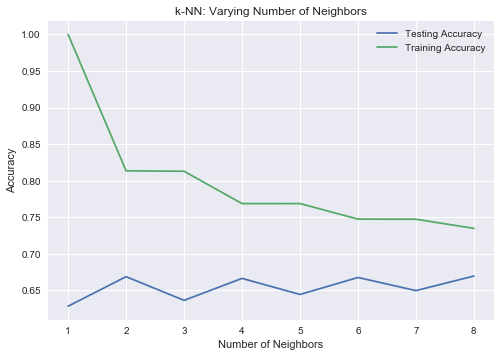

In [43]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Let's compute the classification and confusion matrix in order to see precision,recall,f1-score and support.

In [44]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[29018  3741]
 [11949  2487]]
             precision    recall  f1-score   support

          0       0.71      0.89      0.79     32759
          1       0.40      0.17      0.24     14436

avg / total       0.61      0.67      0.62     47195



The support gives the number of samples of the true response that lie in that class.The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

# Logistic Regression in Classifying the next vacation destination

In [53]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

logreg.score(X_test,y_test)
#The Logistic Regression Threshold=0.5

0.69412013984532261

In [51]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = logreg.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[32759     0]
 [14436     0]]
             precision    recall  f1-score   support

          0       0.69      1.00      0.82     32759
          1       0.00      0.00      0.00     14436

avg / total       0.48      0.69      0.57     47195



C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Plotting the ROC Curve

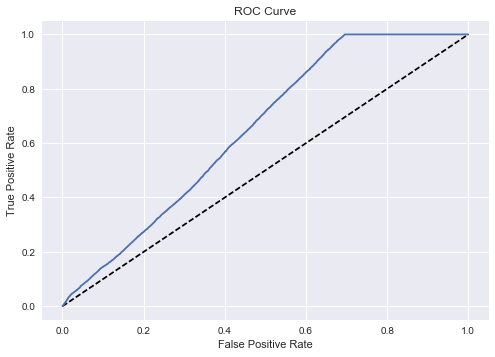

In [47]:
from sklearn.metrics import roc_curve

y_pred_prob=logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##The ROC curve looks a bit fishy.Need to ask Ankit!

In [48]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.6477268802819208
AUC scores computed using 5-fold cross-validation: [ 0.66745863  0.85891883  0.99051627  1.          1.        ]


# Hyperparameter Tuning

GridSearch CV

In [49]:
# Import necessary modules

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv =GridSearchCV(logreg,param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1.0000000000000001e-05}
Best score is 0.6931125448940024


In [50]:
#Randomized Search CV

# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 4}
Best score is 0.6931443282585894


SVM

In [ ]:
# from sklearn import svm

# clf=svm.SVC()
# clf.fit(X_train,y_train)

# accuracy=clf.score(X_test,y_test)
# print(accuracy)

In [ ]:
# # Author: Andreas Mueller <amueller@ais.uni-bonn.de>
# #
# # License: BSD 3 clause

# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# #from sklearn.datasets import load_iris
# from sklearn.decomposition import PCA
# from sklearn.feature_selection import SelectKBest

# #X, y = X,y

# # This dataset is way too high-dimensional. Better do PCA:
# pca = PCA(n_components=2)

# # Maybe some original features where good, too?
# selection = SelectKBest(k=1)

# # Build estimator from PCA and Univariate selection:

# combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# # Use combined features to transform dataset:
# X_features = combined_features.fit(X, y).transform(X)

# svm = SVC(kernel="linear")

# # Do grid search over k, n_components and C:

# pipeline = Pipeline([("features", combined_features), ("svm", svm)])

# param_grid = dict(features__pca__n_components=[1, 2, 3],
#                   features__univ_select__k=[1, 2],
#                   svm__C=[0.1, 1, 10])

# grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
# grid_search.fit(X, y)
# print(grid_search.best_estimator_)